# Nestacionární vedení tepla v 1D

### Diferenciální rovnice problému

Diferenciální rovnice úlohy nestacionárního vedení tepla plyne z <b>bilance energie</b>:

$\displaystyle{
c_vdm\Delta T = \underbrace{q_x(x)A(x)}_{\mbox{vstup}} - \underbrace{\bar{Q}\left(x+\frac{\Delta x}{2}\right)}_{\mbox{zdroj}} - \underbrace{q_x(x+\Delta x)A(x+\Delta x)}_{\mbox{výstup}},
}$

kde $c_v$ \[J kg$^{-1}$K$^{-1}$\] je měrná tepelná kapacita materiálu vyjadřující množství tepla potřebné ke změně teploty jednoho kilogramu materiálu o jeden stupeň a $dm=\rho\Delta x \Delta y$ je diferenciál hmotnosti kontrolního objemu.

Pro $\Delta x\rightarrow 0$ a $\Delta t\rightarrow 0$ a konstantní plochu průřezu 

$\displaystyle{
\rho c_v\frac{\partial T}{\partial t} - \frac{\partial}{\partial x}\left(\lambda\frac{\partial T}{\partial x} \right) = \bar{Q}.
}$




Okrajové podmínky v hraničních bodech řešené oblasti mají stejnou podobu jako v případě stacionárního vedení tepla pouze s tím rozdílem, že nyní mohou záviset na čase. Například

$\displaystyle{ T(0,t) = \bar{T}},$


$\displaystyle{ -\lambda\frac{\partial T}{\partial x}(L,t) = \bar{q},}$

kde $\bar{q}$ lze předepsat přímo číselnou hodnotou, nebo ve formě podmínky modelující přestup tepla (viz stacionární vedení tepla). 

Díky časové závislosti je však nově třeba předepsat takzvanou počáteční podmínku, která říká, jak je teplota po řešené oblasti rozložena v okamžiku počátku řešení. Počáteční teplota může být předepsána libovolnou (obvykle však spojitou) funkcí, kterou označíme $\phi$:

$\displaystyle{T(x,0) = \phi(x).}$


Všimněte si také, že v případě nestacionárního vedení tepla představuje řídící rovnice problému parciální diferenciální rovnici, na rozdíl od stacionárního případu, kde jsme vystačili s obyčejnou diferenciální rovnicí. Tato ''komplikace'' se projeví i ve složitějších postupech řešení. 

### Slabé řešení

Základní přístupy k formulaci slabého řešení
  * diskretizace celé časoprostorové oblasti - časoprostorové prvky (vysoké paměťové nároky)
  * časová diskretizace metodou vážených reziduí
  * časová diskretizace diferenčními schématy
  
  

### Diskretizace podle prostorových proměnných

Vyjdeme z diferenciální rovnice problému

$\displaystyle{
\int_{\Omega} \delta T \left(
\rho c_v\frac{\partial T}{\partial t} - \frac{\partial}{\partial x}\left(\lambda\frac{\partial T}{\partial x} \right) - \bar{Q}\right) d\Omega = 0.
}$


Integrací per partes u druhého členu rovnice získáme

$\displaystyle{  \int_{\Omega} \delta T \left( \rho c_v\frac{\partial T}{\partial t}\right) d\Omega +
\int_{\Omega} \frac{\partial\delta T }{\partial x}\left(\lambda\frac{\partial T}{\partial x} \right) \ d\Omega  -
\int_{\Gamma} \delta T  \lambda\frac{\partial T}{\partial x} d\Omega -
\int_{\Omega} \delta T  \bar{Q} d\Omega = 0. }$


Po rozdělení řešené oblasti na $n$ konečných prvků a po zavedení aproximace neznámých získáme diskretizovaný tvar úlohy

$\displaystyle{ \boldsymbol{P}^e_{\Omega}\dot{\boldsymbol{r}}^e + \left(\boldsymbol{K}^e_{\Omega} + \boldsymbol{K}^e_\Gamma\right)\boldsymbol{r}^e =f^e_{\Gamma_{qc}}+f^e_{\Gamma_{qp}}+f^e_{\Omega}.}$

* Levá strana
    * Matice vodivosti $\displaystyle{K^e_{\Omega}}$
    
    $\displaystyle{\boldsymbol{K}^e_{\Omega} = \int_{\Omega} \boldsymbol{B}^{eT}\lambda\  \boldsymbol{B}^{e} \ dx }$

    * Příspěvek do matice vodivosti od přestupu tepla $\displaystyle{K^e_{\Gamma}}$

    $\displaystyle{\boldsymbol{K}^e_{\Gamma} =\int_{\Gamma_c} \boldsymbol{N}^{eT}\alpha \boldsymbol{N}^e\ ds}$

    * Matice kapacity $\displaystyle{P^e_{\Omega}}$
    
    $\displaystyle{\boldsymbol{P}^e_{\Omega} = \int_{\Omega} c_v\rho\ \boldsymbol{N}^{eT}\boldsymbol{N}^{e} \ dx }$

* Pravá strana

    * Přestup tepla  $\displaystyle{f^e_{\Gamma_c}}$
    
    $\displaystyle{ f^e_{\Gamma_c} = \int_{\Gamma_c}\boldsymbol{N}^{eT}\alpha^e T_0^e(x)  \ ds}$

    * Předepsaný tok  $\displaystyle{f^e_{\Gamma_p}}$

    $\displaystyle{f^e_{\Gamma_p} = - \int_{\Gamma_p}\boldsymbol{N}^{eT}  \bar{q}^e(x)  \ ds}$

    * Vnitřní zdroj  $\displaystyle{ f^e_{\Omega} }$

    $\displaystyle{ f^e_{\Omega} = \int_{\Omega} \boldsymbol{N}^{eT}  \bar{Q}^e(x) \ ds    }$

### Časová diskretizace 

#### Numerická integrace v čase
Pro diskretizaci teploty v čase použijeme metodu konečných diferencí. 
Uvažujme aproximaci řešení na časovém intervalu $[t,t+\Delta t]$ ve tvaru

$\displaystyle{
\boldsymbol{r}^e=(1-\gamma)\boldsymbol{r}^e_t+\gamma\ \boldsymbol{r}^e_{t+\Delta t},\;\;\;\gamma\in[0,1].}
$

Stejným způsobem aproximujeme i vektory okrajových podmínek

$\displaystyle{
\boldsymbol{f}^e = (1-\gamma)\boldsymbol{f}^e_t+\gamma\ \boldsymbol{f}^e_{t+\Delta t},\;\;\;\gamma\in[0,1].}
$

Časovou derivaci vyjádříme pomocí následující diferenční náhrady

$\displaystyle{
\frac{\partial\boldsymbol{r}^e}{\partial t}=\frac{1}{\Delta t}(\boldsymbol{r}^e_{t+\Delta t}-\boldsymbol{r}^e_t).}
$

Po dosazení do slabého řešení  v čase $t+\gamma\Delta t$ (s provedenou prostorovou diskretizací)

$
\displaystyle{
\frac{1}{\Delta t}\boldsymbol{P}^e(\boldsymbol{r}^e_{t+\Delta t}-\boldsymbol{r}^e_t)+ \
\boldsymbol{K}^e\left((1-\gamma)\boldsymbol{R}^e_t+\gamma\boldsymbol{r}^e_\Delta t\right) = 
(1-\gamma)\boldsymbol{f}^e_t+\gamma\boldsymbol{f}^e_{t+\Delta t}.
}$

Po úpravě obdržíme

$\displaystyle{
\left(\gamma\boldsymbol{K}^e+\frac{1}{\Delta t}\boldsymbol{P}\right)\boldsymbol{r}^e_{t+\Delta t}=
\left(-(1-\gamma)\boldsymbol{K}^e+\frac{1}{\Delta t}\boldsymbol{P}^e\right)\boldsymbol{r}^e_t+(1-\gamma)\boldsymbol{f}^e_t+\gamma\boldsymbol{f}^e_{t+\Delta t}.
}$

Poslední rovnice představuje rekurentní vztah pro výpočet uzlových hodnot teploty. Pokud známe počáteční hodnoty, lze opakovaným použitím této rovnice stanovit řešení pro libovolný čas.


Parametr $\gamma$ ovlivňuje stabilitu a přesnost výpočtu, některé hodnoty odpovídají konkrétním metodám numerické integrace
* $\gamma=0$: Dopředná diference (Eulerova metoda), podmínečně stabilní
* $\gamma=\frac{1}{2}$: Metoda Crank-Nicolson, nepodmínečně stabilní
* $\gamma=\frac{2}{3}$: Galerkinova metoda, nepodmínečně stabilní
* $\gamma=1$: Zpětná diference, nepodmínečně stabilní

Poznamenejme, že pro  $\gamma \ge 0.5$ je metoda nepodmíněně stabilní a teoreticky neexistuje žádná omezující podmínka na velikost časového kroku. Pro  $\gamma < 0.5$ je metoda pouze podmíněně stabilní a volbu kroku je nutno volit s ohledem na splnění jisté stabilitní podmínky, viz níže.

#### Diskretizace metodou vážených reziduí

Aproximace vektoru uzlových hodnot v čase 

$\displaystyle{\boldsymbol{T}^e (\tau) = \sum_{i} \boldsymbol{N}^{eT}(\tau) \boldsymbol{T}^e_i},$

kde $\tau\in [0,\Delta t]$. Pro lineární aproximaci

$\displaystyle{\boldsymbol{T}^e (\tau) =  \left(1-\frac{\tau}{\Delta t}\right) \boldsymbol{T}^e_t} + \frac{\tau}{\Delta t} \boldsymbol{T}^e_{t+\Delta t}.$

dosazením do rovnice, přenásobením váhovou funkcí (předpokládáme, že $\boldsymbol{T}_t$ známe, stačí tedy jen jedna váhová funkce) a integrací na intervalu $[0,{\Delta t}]$

$\displaystyle{
\int_0^{\Delta t} w\left[\boldsymbol{P}\left(\frac{\partial\left(1-{\tau}/{{\Delta t}}\right)}{\partial\tau}\boldsymbol{T}_t+\frac{\partial\left(\tau/{\Delta t}\right)}{\partial\tau}\boldsymbol{T}_{t+{\Delta t}}\right)\right. +
\left.\boldsymbol{K}\left( \left(1-\frac{\tau}{{\Delta t}}\right)\boldsymbol{T}_t+\frac{\tau}{{\Delta t}}\boldsymbol{T}_{t+{\Delta t}}\right) - \boldsymbol{f}\right]\ d\tau = 0
}$


Úpravou pak

$\displaystyle{
\frac{1}{{\Delta t}}\boldsymbol{P}(\boldsymbol{T}_{t+{\Delta t}}-\boldsymbol{T}_t)\int_0^{\Delta t} w\ d\tau + \boldsymbol{K}\boldsymbol{T}_t\int_0^{\Delta t} w\ d\tau+
\frac{1}{{\Delta t}}\boldsymbol{K}(\boldsymbol{T}_{t+{\Delta t}}-\boldsymbol{T}_t)\int_0^{\Delta t} w\tau\ d\tau - 
\int_0^{\Delta t} w\boldsymbol{f}\ d\tau = 0
}$


Pokud označíme

$\displaystyle{
\begin{array}{rcl}
  \gamma&=&\displaystyle{\frac{1}{{\Delta t}}\frac{\displaystyle{\int_0^{\Delta t} w\tau\ d\tau}}{\displaystyle{\int_0^{\Delta t} w\ d\tau}}}\\
  \bar{\boldsymbol{f}}&=&\displaystyle{\frac{\displaystyle{\int_0^{\Delta t} w\boldsymbol{f}\ d\tau}}{\displaystyle{\int_0^{\Delta t} w\ d\tau}}}
\end{array}
}$

potom

$\displaystyle{
  \frac{1}{{\Delta t}}\boldsymbol{P}\left(\boldsymbol{T}_{t+{\Delta t}}-\boldsymbol{T}_t\right)+
\boldsymbol{K}\left[\boldsymbol{T}_t+\gamma(\boldsymbol{T}_{t+{\Delta t}}-\boldsymbol{T}_t)\right]-
\bar{\boldsymbol{f}} = 0
}$

a po úpravě dostaneme formálně shodný zápis s předchozím postupem

$\displaystyle{
\underbrace{\left(\gamma\boldsymbol{K}+\frac{1}{{\Delta t}}\boldsymbol{P}\right)}_{\boldsymbol{C}}\boldsymbol{T}_{t+{\Delta t}} =
\underbrace{\left(-(1-\gamma)\boldsymbol{K}+\frac{1}{{\Delta t}}\boldsymbol{P}\right)}_{\boldsymbol{D}}\boldsymbol{T}_t+\bar{\boldsymbol{f}}
}$


Zvolíme-li váhovou funkci $w=\tau/{\Delta t}$ (Galerkin), pak $\gamma = 2/3$, nebo pro $w=konst.$, pak $\gamma=1/2$.

Předností je definice $\bar{\boldsymbol{f}}$, která umožňuje zahrnout obecné změny okrajových podmínek během časového kroku.

## Příklad - 1D úloha
<img src="Figures/ex4.png" width="500">
Stanovte rozložení teploty na intervalu (viz obr.) během časového intervalu [0,10] sekund. Vlevo je teplota předepsána, vpravo je okrajová podmínka přestupu tepla (Hodnoty materiálových konstant jsou pouze ilustrační). Počáteční rozložení teploty je konstantní a má hodnotu 20 K (všimněte si, že počáteční podmínka se vlevo shoduje s okrajovou podmínkou).
* $\lambda = 4\ Wm^{-1}K^{-1}$
* $\alpha = 2\ Wm^{-2}K^{-1}$
* $\rho = 1\ kg/m^{-3}$
* $c_v = 1\ Jkg^{-1}K^{-1}$
* $T_1 = 20\ K$
* $T_o = 10\ K$



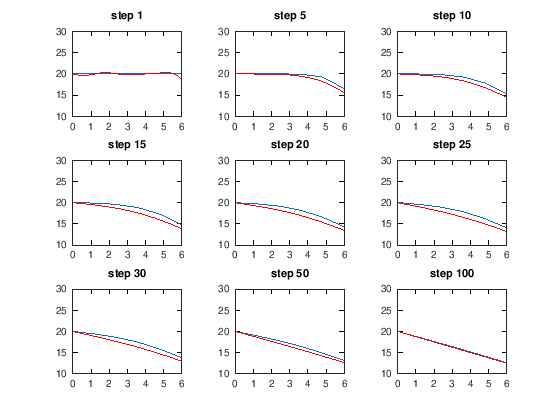

In [1]:
n = 5;
L = 6;
l = L/n;
t_end = 10;
A = 1.0;
lambda = 4;
x1 = 0; x2 = L/n;
alpha = 2; % film coefficient
c = 1; % Thermal capacity
T_o = 10; % Ambient temperature
T_1 = 20;
ro = 1; % Density

dt = 0.1; % Time step
gamma = 2/3; % Numerical integration parameter

ki = (lambda/l)*[1 -1; -1 1];
pi = c*ro*A*l/6*[2 1; 1 2];
fo = 0.0*[(x2*x2-x2^2/2)/l (x2^2/2)/l];
k_gamma = alpha * [0 0; 0 1];
f_alpha = alpha * T_o *[0 1];

K = zeros (n+1);
P = zeros (n+1);
F = zeros (n+1, 1);
for i=1:n
    loc = [i i+1];
    K(loc, loc) += ki;
    P(loc, loc) += pi;
    F(loc)+= fo';
end
F([n n+1]) += f_alpha';
K([n n+1], [n n+1]) += k_gamma;

MK_L = 1/dt*P+gamma*K;
MK_R = 1/dt*P-(1-gamma)*K;



%u = K(2:n+1, 2:n+1)\(F(2:n+1,1));
%U = [0 ; u]


N = t_end / dt;
T_init = 20 * ones(n+1, 1);
T_history = zeros(n+1, N+1);
T_history(:,1) = T_init;
r = K*T_history(:,end)-F;

% Time integration loop
for i=1:N
  if i == 1
    T_curr = T_init;
  else   
    T_curr = T_history(:,i-1);
  end
  RHS = F + MK_R*T_curr - T_1*MK_L(:,1);
  T_next = [T_1; MK_L(2:end,2:end)\RHS(2:end)];
  T_history(:,i+1) = T_next;
endfor;
T_history(:,i);


function [u_ex] = plot_ex_sol(x,t,kappa,n)
u_ex = zeros(n,1);
w_1 = 0.409274;
w_2 = 0.872156;
w_3 = 1.367422;
w_4 = 1.876;
w_5 = 2.9082;
coeff_1 = 18.9071;
coeff_2 = -5.7026;
coeff_3 = 2.5114;
coeff_4 = -1.37262;
coeff_5 = -0.58308;
w = [w_1; w_2; w_3; w_4; w_5];
coeff = [coeff_1, coeff_2, coeff_3,coeff_4,coeff_5 ];
for i = 1:n
  for j = 1:5
    a_j = (2*w(j)  / (6*w(j) - sin(w(j)*6)*cos(w(j)*6)) )*coeff(j);      
    u_ex(i) = u_ex(i) + a_j * exp(-1.0*(w(j)*kappa)^2*t)*sin(w(j)*x(i));        
  end
  u_ex(i) = u_ex(i) + 20 - 1.25*x(i);
end
plot(x,u_ex,'-r','LineWidth',2)
end



%for i = 1:4:N
%  %plot(0:n:4, T_history(:,1), "b;T2 dt=0.1;")
%  plot(0:l:L, T_history(:,i))
%  hold on;
%  plot_ex_sol(0:L/(10*n):L,(i)*dt,sqrt(lambda/(c*ro)),10*n+1);
%  %waitforbuttonpress
%  hold off;
%  %plot(0:dt:t_end, T_history(3,:), "r;T3 dt=0.1;")
%  %plot(0:dt:t_end, r(1,:), "g;q1 dt=0.1;")
%end


stepstoplot = [1 5 10 15 20 25 30 50 100];
for i = 1:9
  subplot(3,3,i);
  plot(0:l:L,T_history(:,stepstoplot(i)));
  hold on
  plot_ex_sol(0:L/(10*n):L,(stepstoplot(i)-1)*dt,sqrt(lambda/(c*ro)),10*n+1);
  ylim([10 30]);
  title(sprintf("step %d",stepstoplot(i)))
endfor

### Řešení nestacionární úlohy explicitní metodou
Při řešení explicitní metodou je stabilita výpočtu podmíněna délkou časového kroku. Maximální délka kroku pro podmínečně stabilní metody $\bigg(\gamma < \frac{1}{2}\bigg)$ se stanoví jako

$\displaystyle{\Delta t = \frac{2}{(1-2\gamma)\lambda_{max}}},$

kde $\lambda_{max}$ je největší vlastní číslo rovnice

$\displaystyle{(\boldsymbol{K}-\lambda \boldsymbol{P})r=0}.$

In [4]:
gamma = 0.0; % Numerical integration parameter

% Critical time step
dt_crit=2/(1-2*gamma)/max(qz(K, P))

dt_crit =  0.057561


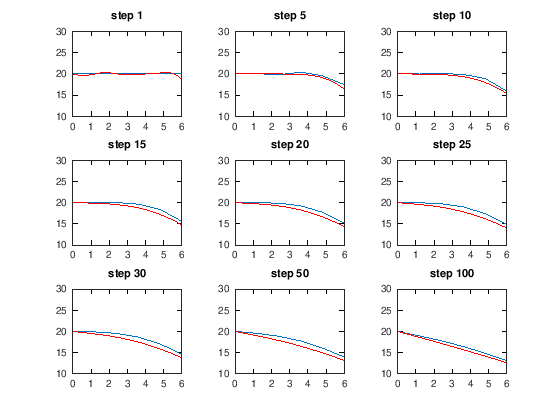

In [5]:
n = 5;
L = 6;
l = L/n;
t_end = 10;
A = 1.0;
lambda = 4;
x1 = 0; x2 = L/n;
alpha = 2; % film coefficient
c = 1; % Thermal capacity
T_o = 10; % Ambient temperature
T_1 = 20;
ro = 1; % Density
dt = 0.1; % Time step - UNSTABLE
%dt = 0.05; % STABLE

ki = (lambda/l)*[1 -1; -1 1];
pi = c*ro*A*l/6*[2 1; 1 2];
fo = 0.0*[(x2*x2-x2^2/2)/l (x2^2/2)/l];
k_gamma = alpha * [0 0; 0 1];
f_alpha = alpha * T_o *[0 1];

K = zeros (n+1);
P = zeros (n+1);
F = zeros (n+1, 1);
for i=1:n
    loc = [i i+1];
    K(loc, loc) += ki;
    P(loc, loc) += pi;
    F(loc)+= fo';
end
F([n n+1]) += f_alpha';
K([n n+1], [n n+1]) += k_gamma;

MK_L = 1/dt*P+gamma*K;
MK_R = 1/dt*P-(1-gamma)*K;



%u = K(2:n+1, 2:n+1)\(F(2:n+1,1));
%U = [0 ; u]


N = t_end / dt;
T_init = 20 * ones(n+1, 1);
T_history = zeros(n+1, N+1);
T_history(:,1) = T_init;
r = K*T_history(:,end)-F;

% Time integration loop
for i=1:N
  if i == 1
    T_curr = T_init;
  else   
    T_curr = T_history(:,i-1);
  end
  RHS = F + MK_R*T_curr - T_1*MK_L(:,1);
  T_next = [T_1; MK_L(2:end,2:end)\RHS(2:end)];
  T_history(:,i+1) = T_next;
endfor;
T_history(:,i);


function [u_ex] = plot_ex_sol(x,t,kappa,n)
u_ex = zeros(n,1);
w_1 = 0.409274;
w_2 = 0.872156;
w_3 = 1.367422;
w_4 = 1.876;
w_5 = 2.9082;
coeff_1 = 18.9071;
coeff_2 = -5.7026;
coeff_3 = 2.5114;
coeff_4 = -1.37262;
coeff_5 = -0.58308;
w = [w_1; w_2; w_3; w_4; w_5];
coeff = [coeff_1, coeff_2, coeff_3,coeff_4,coeff_5 ];
for i = 1:n
  for j = 1:5
    a_j = (2*w(j)  / (6*w(j) - sin(w(j)*6)*cos(w(j)*6)) )*coeff(j);      
    u_ex(i) = u_ex(i) + a_j * exp(-1.0*(w(j)*kappa)^2*t)*sin(w(j)*x(i));        
  end
  u_ex(i) = u_ex(i) + 20 - 1.25*x(i);
end
plot(x,u_ex,'-r','LineWidth',2)
end



for i = 1:4:N
  %plot(0:n:4, T_history(:,1), "b;T2 dt=0.1;")
  plot(0:l:L, T_history(:,i))
  hold on;
  plot_ex_sol(0:L/(10*n):L,(i)*dt,sqrt(lambda/(c*ro)),10*n+1);
  %waitforbuttonpress
  hold off;
  %plot(0:dt:t_end, T_history(3,:), "r;T3 dt=0.1;")
  %plot(0:dt:t_end, r(1,:), "g;q1 dt=0.1;")
end


stepstoplot = [1 5 10 15 20 25 30 50 100];
for i = 1:9
  subplot(3,3,i);
  plot(0:l:L,T_history(:,stepstoplot(i)));
  hold on
  plot_ex_sol(0:L/(10*n):L,(stepstoplot(i)-1)*dt,sqrt(lambda/(c*ro)),10*n+1);
  ylim([10 30]);
  title(sprintf("step %d",stepstoplot(i)))
endfor